In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans

# supress scientific notation
np.set_printoptions(suppress=True)

import wrangle

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,acres,age,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,53571.0,1286.0,96978.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01,0.103444,19.0,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,13091.0,2061.0,97099.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01,0.290335,50.0,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,21412.0,1286.0,97078.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01,0.193572,55.0,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,396551.0,3101.0,96330.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01,0.299311,47.0,Los_Angeles
6,12095076,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,47019.0,3101.0,96293.0,276684.0,773303.0,496619.0,9516.26,-0.001011,2017-01-01,1.446281,67.0,Los_Angeles


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50216 entries, 0 to 77573
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50216 non-null  int64  
 1   bathroomcnt                   50216 non-null  float64
 2   bedroomcnt                    50216 non-null  float64
 3   calculatedfinishedsquarefeet  50216 non-null  float64
 4   fips                          50216 non-null  float64
 5   latitude                      50216 non-null  float64
 6   longitude                     50216 non-null  float64
 7   regionidcity                  50216 non-null  float64
 8   regionidcounty                50216 non-null  float64
 9   regionidzip                   50216 non-null  float64
 10  structuretaxvaluedollarcnt    50216 non-null  float64
 11  taxvaluedollarcnt             50216 non-null  float64
 12  landtaxvaluedollarcnt         50216 non-null  float64
 13  t

<AxesSubplot:>

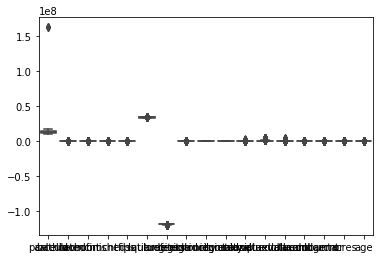

In [5]:
sns.boxplot(data = df)

In [6]:
df.drop(columns = ['parcelid', 'county', 'transactiondate'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50216 entries, 0 to 77573
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   50216 non-null  float64
 1   bedroomcnt                    50216 non-null  float64
 2   calculatedfinishedsquarefeet  50216 non-null  float64
 3   fips                          50216 non-null  float64
 4   latitude                      50216 non-null  float64
 5   longitude                     50216 non-null  float64
 6   regionidcity                  50216 non-null  float64
 7   regionidcounty                50216 non-null  float64
 8   regionidzip                   50216 non-null  float64
 9   structuretaxvaluedollarcnt    50216 non-null  float64
 10  taxvaluedollarcnt             50216 non-null  float64
 11  landtaxvaluedollarcnt         50216 non-null  float64
 12  taxamount                     50216 non-null  float64
 13  l

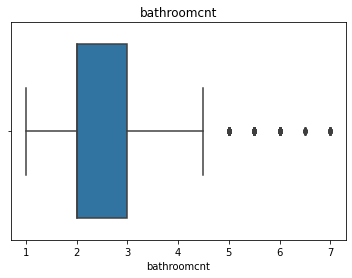

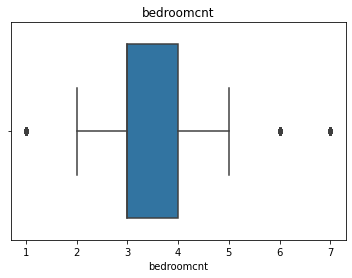

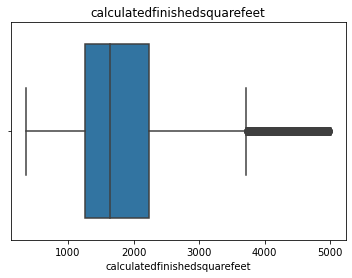

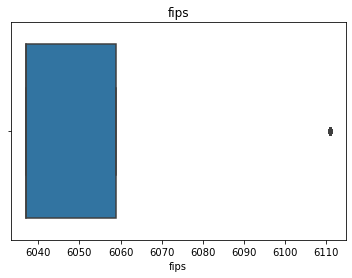

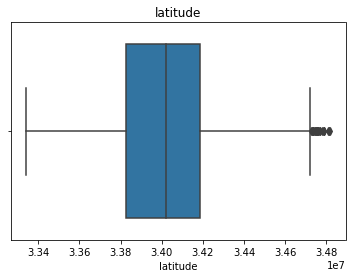

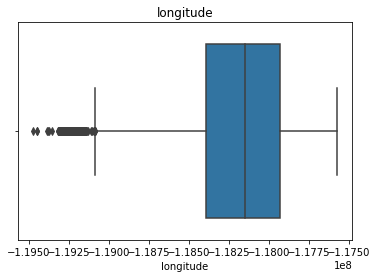

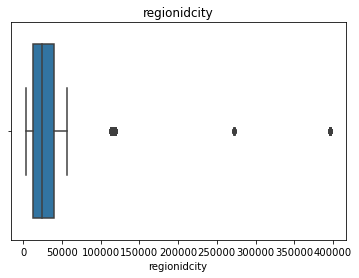

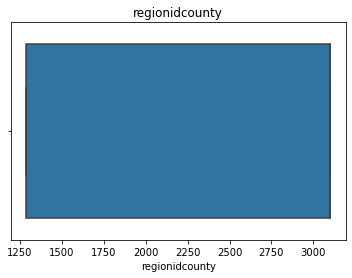

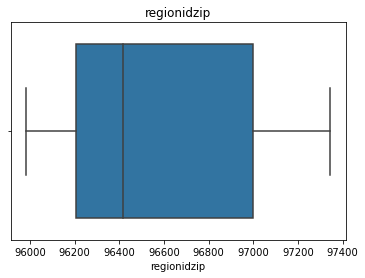

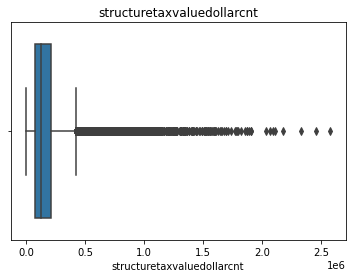

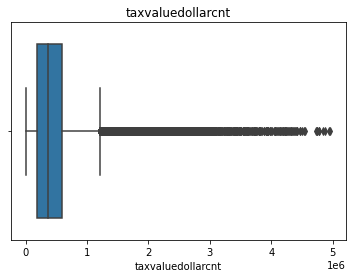

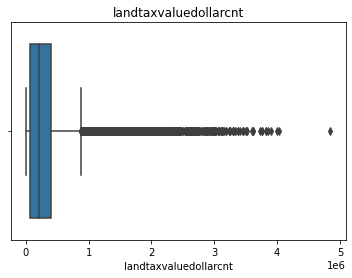

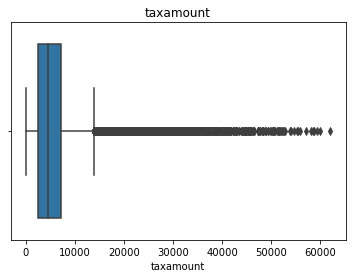

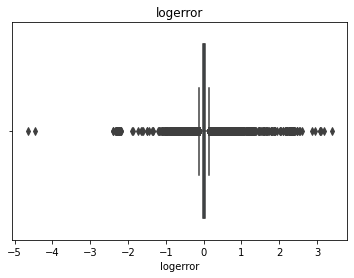

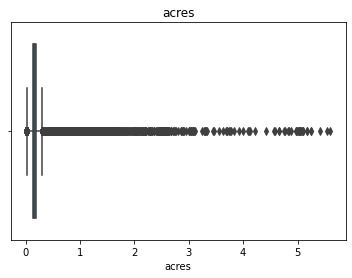

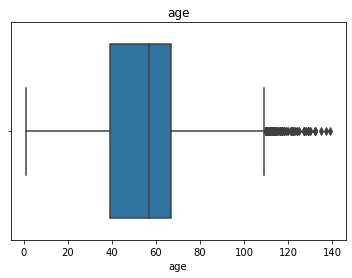

In [8]:
# visualize features for outliers
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,50216.0,2.240810e+00,0.905357,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
bedroomcnt,50216.0,3.276187e+00,0.895390,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00
calculatedfinishedsquarefeet,50216.0,1.842641e+03,800.560278,3.600000e+02,1.260000e+03,1.638000e+03,2.243000e+03,4.999000e+03
fips,50216.0,6.049165e+03,21.093627,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
latitude,50216.0,3.402167e+07,272372.868230,3.334062e+07,3.382757e+07,3.401942e+07,3.418603e+07,3.481877e+07
longitude,50216.0,-1.181930e+08,354634.548294,-1.194753e+08,-1.183937e+08,-1.181508e+08,-1.179305e+08,-1.175723e+08
regionidcity,50216.0,3.363689e+04,49571.054838,3.491000e+03,1.244700e+04,2.481200e+04,4.022700e+04,3.965560e+05
regionidcounty,50216.0,2.525539e+03,803.233435,1.286000e+03,1.286000e+03,3.101000e+03,3.101000e+03,3.101000e+03
regionidzip,50216.0,9.656812e+04,422.971992,9.598200e+04,9.620600e+04,9.641500e+04,9.699600e+04,9.734400e+04
structuretaxvaluedollarcnt,50216.0,1.757288e+05,165059.780802,1.480000e+02,7.597800e+04,1.287665e+05,2.157740e+05,2.576028e+06


In [10]:
df = df[df.fips == 6059]

In [11]:
df.sample(25)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age
68507,3.0,4.0,3097.0,6059.0,33579323.0,-117654732.0,12773.0,1286.0,96996.0,267664.0,492326.0,224662.0,4929.86,-0.010547,0.179063,33.0
46604,2.0,3.0,1554.0,6059.0,33812075.0,-118009451.0,16764.0,1286.0,97023.0,132374.0,206586.0,74212.0,2687.72,-0.004774,0.205005,43.0
43926,2.5,4.0,1783.0,6059.0,33673846.0,-117826908.0,52650.0,1286.0,96948.0,135715.0,366121.0,230406.0,3854.16,0.032822,0.128834,48.0
14169,1.5,4.0,1830.0,6059.0,33813314.0,-118019618.0,10608.0,1286.0,96180.0,91972.0,555000.0,463028.0,6365.70,-0.022287,0.137741,59.0
2450,2.5,3.0,1404.0,6059.0,33777781.0,-117928319.0,24832.0,1286.0,97047.0,92982.0,342037.0,249055.0,4306.00,-0.011305,0.046189,44.0
32313,2.5,3.0,1651.0,6059.0,33739085.0,-117768766.0,52650.0,1286.0,96939.0,219860.0,692517.0,472657.0,8419.10,0.004946,0.074656,19.0
70607,2.0,6.0,2346.0,6059.0,33734855.0,-118015765.0,25218.0,1286.0,96965.0,98863.0,730980.0,632117.0,8129.14,0.028180,0.137741,55.0
63576,2.0,4.0,1802.0,6059.0,33728728.0,-118037885.0,25218.0,1286.0,96967.0,94862.0,380912.0,286050.0,4365.60,0.019112,0.183655,58.0
40285,2.0,3.0,1876.0,6059.0,33648606.0,-117894849.0,53571.0,1286.0,96978.0,113980.0,832061.0,718081.0,9311.80,-0.279995,0.175964,58.0
28156,2.5,3.0,1601.0,6059.0,33748983.0,-118007553.0,34780.0,1286.0,96990.0,108037.0,445001.0,336964.0,5374.20,0.106190,0.171304,61.0


In [12]:
# split data
train, validate, test = wrangle.split_data(df)

In [13]:
# create baseline logerror
# train['baseline'] = train.logerror.mean()

In [14]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age
51018,2.0,4.0,1778.0,6059.0,33899035.0,-117945594.0,24812.0,1286.0,97041.0,59980.0,88897.0,28917.0,1233.48,-0.007591,0.363981,44.0
20463,2.5,4.0,2204.0,6059.0,33599399.0,-117863314.0,53571.0,1286.0,96957.0,128881.0,2946096.0,2817215.0,31194.80,-0.001389,0.198347,50.0
60262,1.5,2.0,1162.0,6059.0,33619600.0,-117936000.0,53571.0,1286.0,96981.0,17799.0,129690.0,111891.0,1634.94,-0.143939,0.068871,84.0
26314,2.0,3.0,1412.0,6059.0,33751353.0,-117976583.0,34780.0,1286.0,96973.0,51137.0,135047.0,83910.0,2078.72,-0.083685,0.231818,60.0
1078,2.0,4.0,1356.0,6059.0,33739697.0,-117951439.0,34780.0,1286.0,96990.0,45359.0,69381.0,24022.0,1283.14,-0.258674,0.378788,54.0


<AxesSubplot:xlabel='fips', ylabel='logerror'>

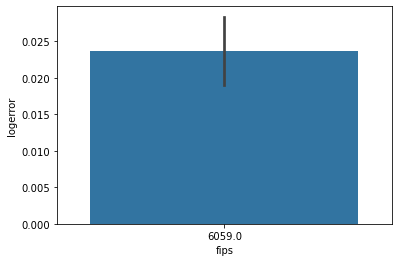

In [15]:
sns.barplot(data = train, x = 'fips', y = 'logerror')

In [16]:
train.groupby('fips').logerror.mean()

fips
6059.0    0.023696
Name: logerror, dtype: float64

<AxesSubplot:xlabel='logerror'>

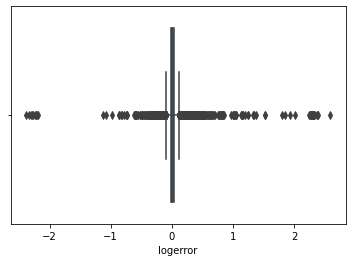

In [17]:
sns.boxplot(data = train, x = 'logerror')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

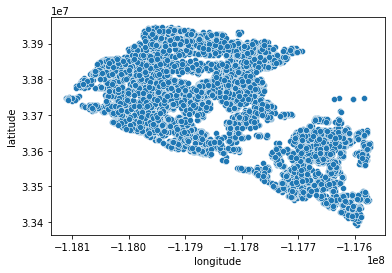

In [18]:
# pseudo map of data
sns.scatterplot(x='longitude',y='latitude',data=train, palette = 'turbo')

In [19]:
# scale data
scaler, train_scaled, validate_scaled, test_scaled = wrangle.min_max_scaler(train, validate, test)

In [20]:
train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age
51018,0.166667,0.500000,0.302255,0.0,0.915496,0.307648,0.390809,0.0,0.957731,0.033822,0.014352,0.004270,0.017003,0.477760,0.136332,0.344262
20463,0.250000,0.500000,0.394623,0.0,0.374125,0.460269,0.971740,0.0,0.864294,0.077215,0.592332,0.580487,0.590829,0.479005,0.072356,0.393443
60262,0.083333,0.166667,0.168690,0.0,0.410623,0.325444,0.971740,0.0,0.890990,0.007256,0.022604,0.021417,0.024691,0.450392,0.022345,0.672131
26314,0.166667,0.333333,0.222897,0.0,0.648669,0.250166,0.592162,0.0,0.882091,0.028252,0.023688,0.015634,0.033191,0.462487,0.085284,0.475410
1078,0.166667,0.500000,0.210755,0.0,0.627610,0.296806,0.592162,0.0,0.901001,0.024614,0.010404,0.003258,0.017954,0.427363,0.142052,0.426230


## Ask questions
- What can we cluster?
    - bed/bath/sqft
    - lat/long/age/fips/acres
    - structuretax/taxvaluedollar/landtax/taxamount/acres
    - acres/sqft
    - bed/bath/taxvalue
- What drives logerror?
    - Bed/bath/sqft Clusters on logerror
    - Bed on logerror
    - bath on logerror
    - sqft on logerror
    - fips on logerror

## Clustering workflow
1. Choose features, create dataframe X
2. Elbow method to find k
3. Kmeans to create clusters
4. Add clusters to dataframe
5. Create centroids df for plotting
6. Visualize clusters
7. Statistical tests for logerror

In [21]:
train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age
51018,0.166667,0.500000,0.302255,0.0,0.915496,0.307648,0.390809,0.0,0.957731,0.033822,0.014352,0.004270,0.017003,0.477760,0.136332,0.344262
20463,0.250000,0.500000,0.394623,0.0,0.374125,0.460269,0.971740,0.0,0.864294,0.077215,0.592332,0.580487,0.590829,0.479005,0.072356,0.393443
60262,0.083333,0.166667,0.168690,0.0,0.410623,0.325444,0.971740,0.0,0.890990,0.007256,0.022604,0.021417,0.024691,0.450392,0.022345,0.672131
26314,0.166667,0.333333,0.222897,0.0,0.648669,0.250166,0.592162,0.0,0.882091,0.028252,0.023688,0.015634,0.033191,0.462487,0.085284,0.475410
1078,0.166667,0.500000,0.210755,0.0,0.627610,0.296806,0.592162,0.0,0.901001,0.024614,0.010404,0.003258,0.017954,0.427363,0.142052,0.426230


## Cluster 1: features_cluster
- Bed Bath Sqft Taxvalue

In [22]:
# define features for clustering
X_train_feature_cluster = train_scaled[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt']]
# define target
y_train = train_scaled.logerror

#repeat for validate ant test
X_validate_feature_cluster = validate_scaled[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt']]
y_validate = validate_scaled.logerror

X_test_feature_cluster = test_scaled[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt']]
y_test = test_scaled.logerror


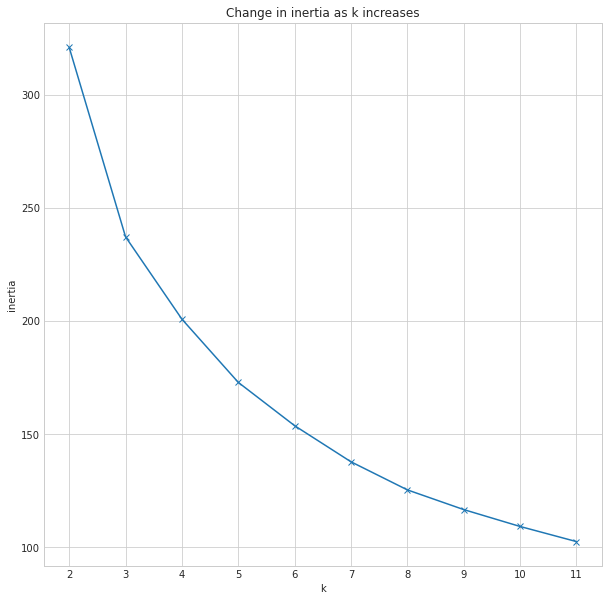

In [23]:
# elbow method to find k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    pd.Series({k: KMeans(k).fit(X_train_feature_cluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

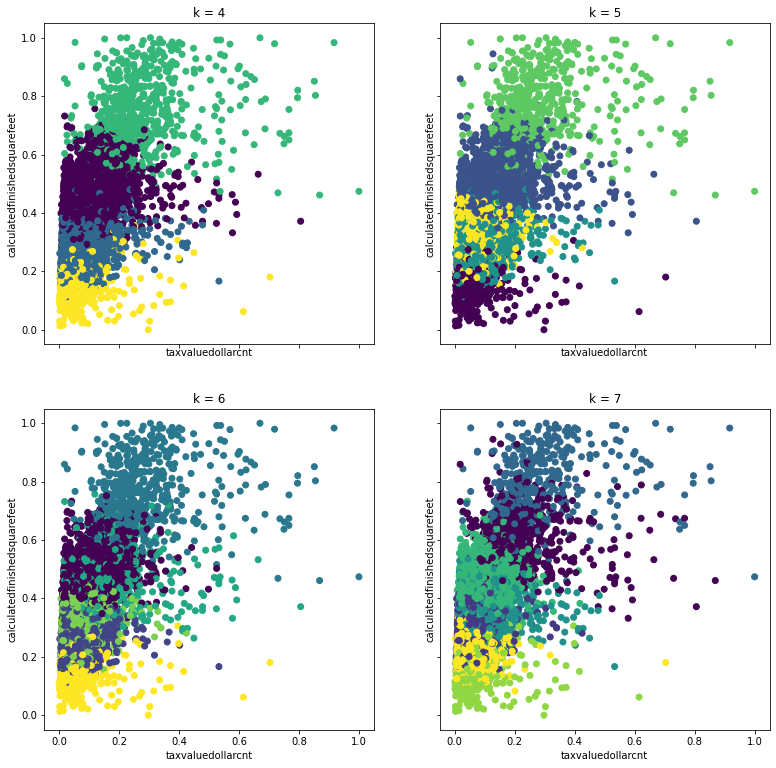

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(4, 8)):
    clusters = KMeans(k).fit(X_train_feature_cluster).predict(X_train_feature_cluster)
    ax.scatter(X_train_feature_cluster.taxvaluedollarcnt, X_train_feature_cluster.calculatedfinishedsquarefeet, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='taxvaluedollarcnt', ylabel='calculatedfinishedsquarefeet')

possible k = 4, 5 or 6

We will be using k = 4

In [25]:
# define cluster object
kmeans = KMeans(n_clusters=4, random_state = 333)
# fit cluster object to features
kmeans.fit(X_train_feature_cluster)
# use the object
kmeans.predict(X_train_feature_cluster);

In [26]:
# add cluster features to train and X_train df's
train['feature_cluster'] = kmeans.predict(X_train_feature_cluster)

X_train_feature_cluster['feature_cluster'] = kmeans.predict(X_train_feature_cluster)

In [27]:
# adjust column for plotting purposes
# train['feature_cluster'] = 'cluster_' + train.feature_cluster.astype(str)
# X_train['feature_cluster'] = 'cluster_' + X_train.feature_cluster.astype(str)

In [28]:
X_train_feature_cluster

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,feature_cluster
51018,0.500000,0.166667,0.302255,0.014352,2
20463,0.500000,0.250000,0.394623,0.592332,0
60262,0.166667,0.083333,0.168690,0.022604,1
26314,0.333333,0.166667,0.222897,0.023688,2
1078,0.500000,0.166667,0.210755,0.010404,2
...,...,...,...,...,...
33375,0.166667,0.000000,0.096271,0.065332,1
33513,0.500000,0.583333,0.881613,0.193377,3
43623,0.333333,0.083333,0.168040,0.005635,1
23208,0.666667,0.583333,0.655247,0.199547,3


In [29]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age,feature_cluster
51018,2.0,4.0,1778.0,6059.0,33899035.0,-117945594.0,24812.0,1286.0,97041.0,59980.0,88897.0,28917.0,1233.48,-0.007591,0.363981,44.0,2
20463,2.5,4.0,2204.0,6059.0,33599399.0,-117863314.0,53571.0,1286.0,96957.0,128881.0,2946096.0,2817215.0,31194.80,-0.001389,0.198347,50.0,0
60262,1.5,2.0,1162.0,6059.0,33619600.0,-117936000.0,53571.0,1286.0,96981.0,17799.0,129690.0,111891.0,1634.94,-0.143939,0.068871,84.0,1
26314,2.0,3.0,1412.0,6059.0,33751353.0,-117976583.0,34780.0,1286.0,96973.0,51137.0,135047.0,83910.0,2078.72,-0.083685,0.231818,60.0,2
1078,2.0,4.0,1356.0,6059.0,33739697.0,-117951439.0,34780.0,1286.0,96990.0,45359.0,69381.0,24022.0,1283.14,-0.258674,0.378788,54.0,2


In [30]:
X_train_feature_cluster.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,feature_cluster
51018,0.500000,0.166667,0.302255,0.014352,2
20463,0.500000,0.250000,0.394623,0.592332,0
60262,0.166667,0.083333,0.168690,0.022604,1
26314,0.333333,0.166667,0.222897,0.023688,2
1078,0.500000,0.166667,0.210755,0.010404,2


In [31]:
pd.DataFrame(kmeans.cluster_centers_)



,0,1,2,3
0,0.501811,0.306787,0.468696,0.124631
1,0.211404,0.084357,0.175245,0.066661
2,0.380196,0.195025,0.269385,0.079303
3,0.565075,0.529260,0.739062,0.272893


In [32]:
# def get_centroids(kmeans, cluster_vars, cluster_name):
#     # get the centroids for each distinct cluster...

#     centroid_col_names = ['centroid_' + i for i in cluster_vars]

#     centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
#                                columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

#     return centroid_df

In [33]:
X_train_feature_cluster.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,feature_cluster
51018,0.500000,0.166667,0.302255,0.014352,2
20463,0.500000,0.250000,0.394623,0.592332,0
60262,0.166667,0.083333,0.168690,0.022604,1
26314,0.333333,0.166667,0.222897,0.023688,2
1078,0.500000,0.166667,0.210755,0.010404,2


In [34]:
X_train_feature_cluster.loc[:, X_train_feature_cluster.columns != 'feature_cluster']

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
51018,0.500000,0.166667,0.302255,0.014352
20463,0.500000,0.250000,0.394623,0.592332
60262,0.166667,0.083333,0.168690,0.022604
26314,0.333333,0.166667,0.222897,0.023688
1078,0.500000,0.166667,0.210755,0.010404
...,...,...,...,...
33375,0.166667,0.000000,0.096271,0.065332
33513,0.500000,0.583333,0.881613,0.193377
43623,0.333333,0.083333,0.168040,0.005635
23208,0.666667,0.583333,0.655247,0.199547


In [35]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X_train_feature_cluster.loc[:, X_train_feature_cluster.columns != 'feature_cluster'].columns)

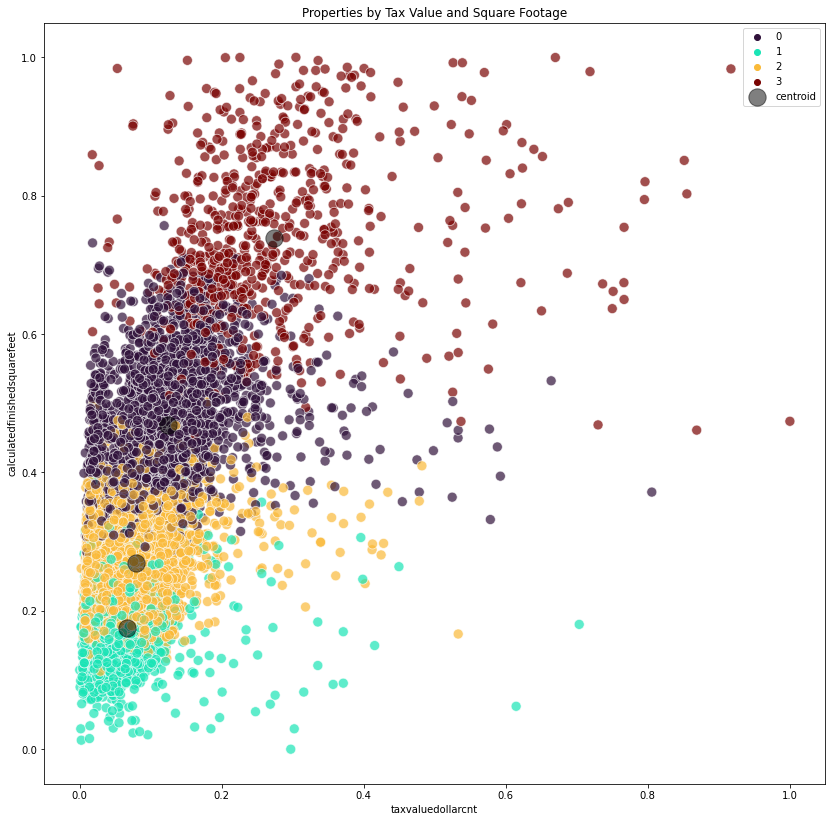

In [36]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_train_feature_cluster, x = 'taxvaluedollarcnt', y = 'calculatedfinishedsquarefeet', hue = 'feature_cluster', s = 100, alpha = 0.7, palette = 'turbo')
centroids.plot.scatter(x='taxvaluedollarcnt',y='calculatedfinishedsquarefeet',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Properties by Tax Value and Square Footage')
plt.legend(loc = 'upper right')

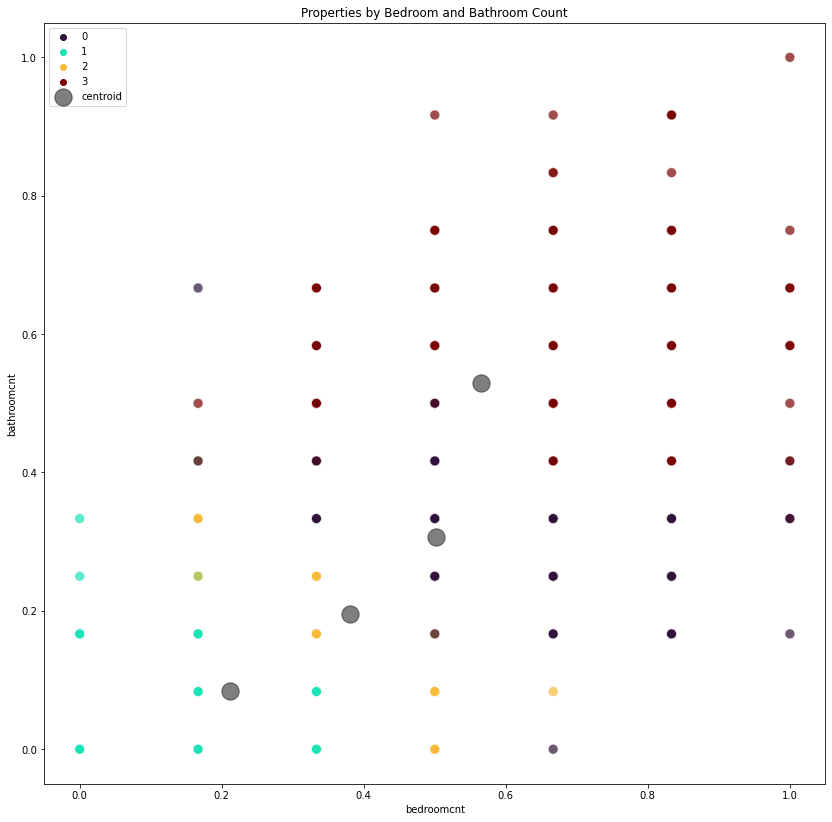

In [37]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_train_feature_cluster, x = 'bedroomcnt', y = 'bathroomcnt', hue = 'feature_cluster', s = 100, alpha = 0.7, palette = 'turbo')
centroids.plot.scatter(x='bedroomcnt',y='bathroomcnt',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Properties by Bedroom and Bathroom Count')
plt.legend(loc = 'upper left')

Cluster 1 = low taxvalue, low sqft, low bed/bath
    Small houses with few bed/bath
    
Cluster 2 = low-mid tax, low-mid sqft, low-mid bed/bath
    Small houses with a couple bed/bath
    
Cluster 3 = high taxvalue, high sqft, high bed/bath
    Large houses with more bathrooms
        MORE BATHS MORE RICH?
        
Cluster 4 = average taxvalue, diverse sqft : bed/bath

## Cluster 2: value_cluster
- structuretax/taxvaluedollar/landtax/taxamount

In [38]:
train_scaled.index

Int64Index([51018, 20463, 60262, 26314,  1078, 68276, 10185, 13264, 69662,
            41659,
            ...
             3234, 31518, 14220, 68294, 23864, 33375, 33513, 43623, 23208,
            17246],
           dtype='int64', length=7553)

In [39]:
# define features for clustering
X_train_value_cluster = train_scaled[['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']]

#repeat for validate and test
X_validate_value_cluster = validate_scaled[['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']]
X_test_value_cluster = test_scaled[['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']]


In [40]:
X_train_value_cluster

,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
51018,0.033822,0.014352,0.004270,0.017003
20463,0.077215,0.592332,0.580487,0.590829
60262,0.007256,0.022604,0.021417,0.024691
26314,0.028252,0.023688,0.015634,0.033191
1078,0.024614,0.010404,0.003258,0.017954
...,...,...,...,...
33375,0.021982,0.065332,0.060235,0.066093
33513,0.287081,0.193377,0.104056,0.188617
43623,0.015696,0.005635,0.001312,0.009976
23208,0.253586,0.199547,0.121350,0.191157


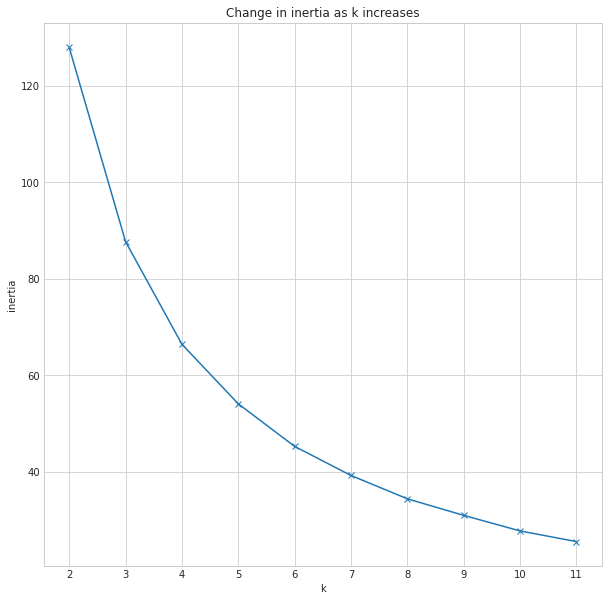

In [41]:
# elbow method to find k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    pd.Series({k: KMeans(k).fit(X_train_value_cluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

k = 4

In [42]:
# define cluster object
kmeans = KMeans(n_clusters=4, random_state = 333)
# fit cluster object to features
kmeans.fit(X_train_value_cluster)
# use the object
kmeans.predict(X_train_value_cluster);

In [43]:
X_train_value_cluster

,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
51018,0.033822,0.014352,0.004270,0.017003
20463,0.077215,0.592332,0.580487,0.590829
60262,0.007256,0.022604,0.021417,0.024691
26314,0.028252,0.023688,0.015634,0.033191
1078,0.024614,0.010404,0.003258,0.017954
...,...,...,...,...
33375,0.021982,0.065332,0.060235,0.066093
33513,0.287081,0.193377,0.104056,0.188617
43623,0.015696,0.005635,0.001312,0.009976
23208,0.253586,0.199547,0.121350,0.191157


In [44]:
# add cluster features to train and X_train df's
train['value_cluster'] = kmeans.predict(X_train_value_cluster)

X_train_value_cluster['value_cluster'] = kmeans.predict(X_train_value_cluster);

In [45]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X_train_value_cluster.loc[:, X_train_value_cluster.columns != 'value_cluster'].columns)

In [46]:
centroids

,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,0.132053,0.135005,0.095294,0.142072
1,0.056545,0.051885,0.035156,0.055690
2,0.336308,0.536905,0.438846,0.552114
3,0.330692,0.255196,0.152899,0.282200


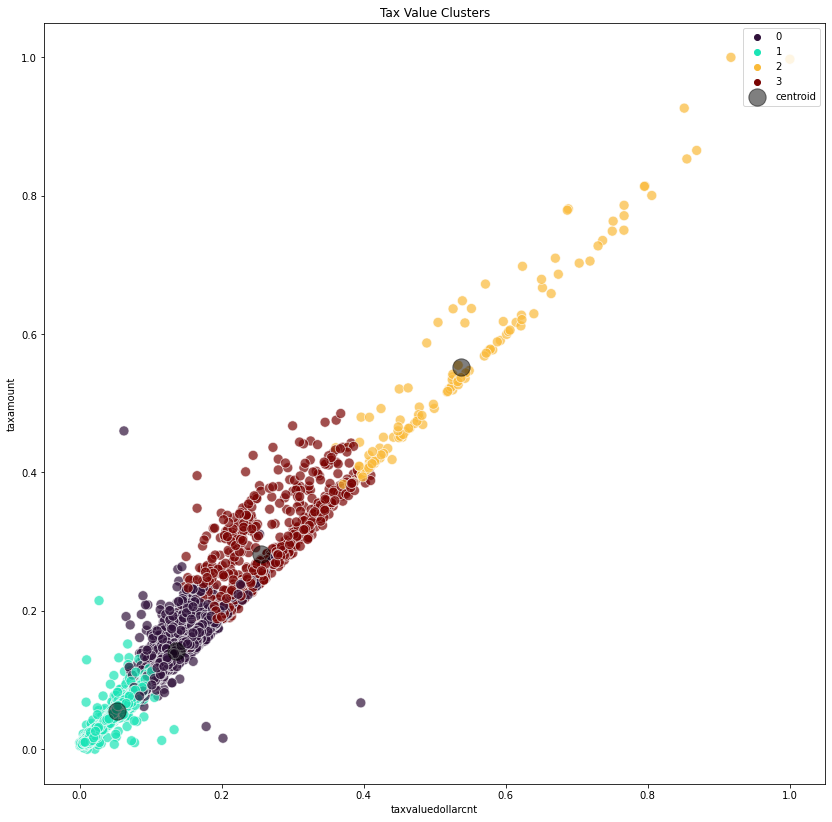

In [47]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_train_value_cluster, x = 'taxvaluedollarcnt', y = 'taxamount', hue = 'value_cluster', s = 100, alpha = 0.7, palette = 'turbo')
centroids.plot.scatter(x='taxvaluedollarcnt',y='taxamount',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Tax Value Clusters')
plt.legend(loc = 'upper right')

## Cluster 3: development_cluster
- lat/long, age

In [48]:
X_train_development_cluster = train[['latitude','longitude','age']]

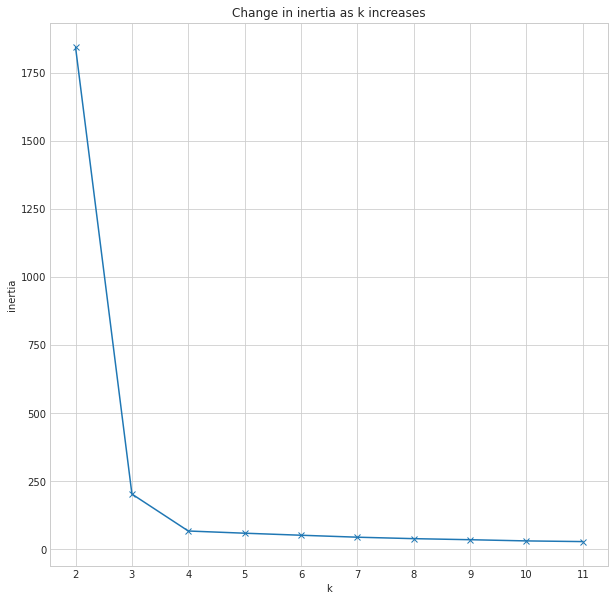

In [49]:
# elbow method to find k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    pd.Series({k: KMeans(k).fit(X_train_value_cluster).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [50]:
# define cluster object
kmeans = KMeans(n_clusters=4, random_state = 333)
# fit cluster object to features
kmeans.fit(X_train_development_cluster)
# use the object
kmeans.predict(X_train_development_cluster);

In [51]:
# add cluster features to train and X_train df's
train['development_cluster'] = kmeans.predict(X_train_development_cluster)

X_train_development_cluster['development_cluster'] = kmeans.predict(X_train_development_cluster);

In [52]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X_train_development_cluster.loc[:, X_train_development_cluster.columns != 'development_cluster'].columns)

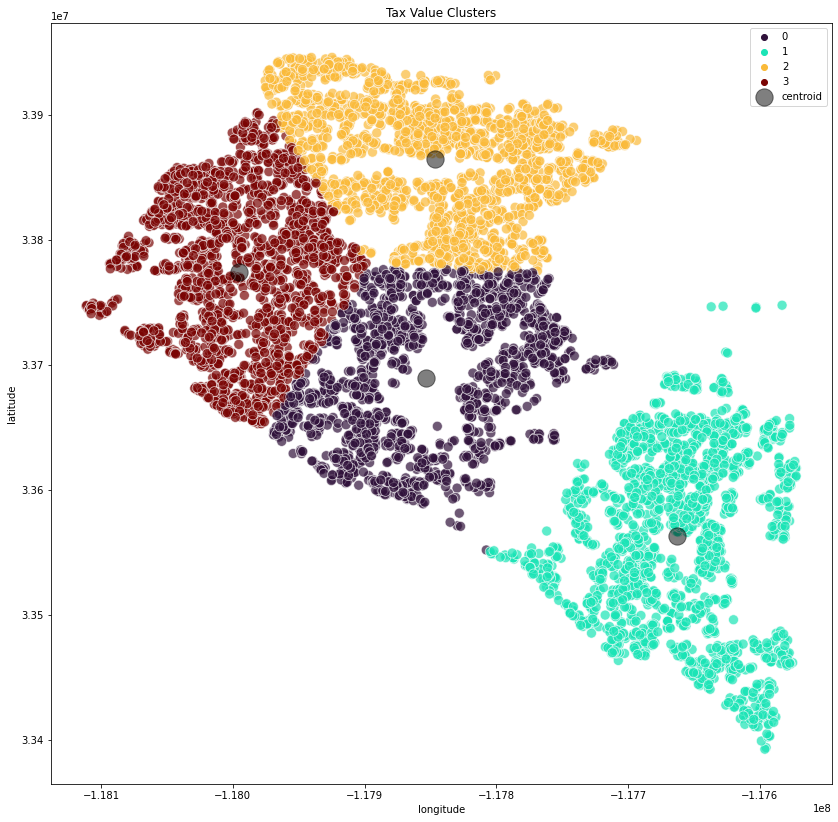

In [53]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_train_development_cluster, x = 'longitude', y = 'latitude', hue = 'development_cluster', s = 100, alpha = 0.7, palette = 'turbo')
centroids.plot.scatter(x='longitude',y='latitude',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Tax Value Clusters')
plt.legend(loc = 'upper right')

# Statistical Tests

### 1. Is logerror different between clusters based on house features?
- Run anova test

$H_{0}$: Means of the logerror between clusters are equal

$H_{a}$ Means of the logerror between clusters are not equal

In [54]:
from scipy import stats
alpha = 0.5

In [55]:
f, p = stats.f_oneway(train[train.feature_cluster == 0].logerror,
                     train[train.feature_cluster == 1].logerror,
                     train[train.feature_cluster == 2].logerror,
                     train[train.feature_cluster == 3].logerror)

In [56]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


#### The means are different, but is there a correlation between our cluster and logerror?

- pearsonr test

$H_{0}$: There is no correlation between feature clusters and logerror

$H_{a}$ There is a correlation between feature clusters and logerror

In [57]:
x = train.feature_cluster
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


#### There is no correlation, let's visualize it to double check

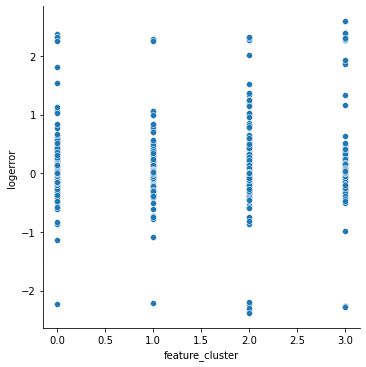

In [58]:
sns.relplot(data = train, x = 'feature_cluster', y = 'logerror')

### 2. Is logerror different between clusters based on value and is there a correlation between the clusters and logerror?

- Run anova test

$H_{0}$: Means of the logerror between clusters are equal

$H_{a}$ Means of the logerror between clusters are not equal


In [59]:
f, p = stats.f_oneway(train[train.value_cluster == 0].logerror,
                     train[train.value_cluster == 1].logerror,
                     train[train.value_cluster == 2].logerror,
                     train[train.value_cluster == 3].logerror)

In [60]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


#### The means are different, is there a correlation?

- pearsonr test

$H_{0}$: There is no correlation between feature clusters and logerror

$H_{a}$ There is a correlation between feature clusters and logerror

In [61]:
x = train.value_cluster
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


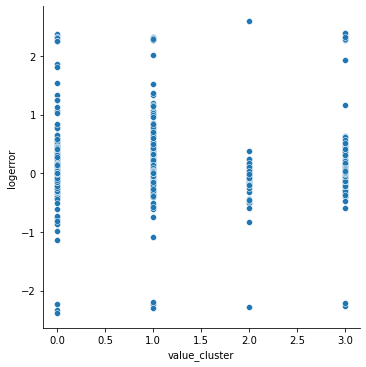

In [62]:
sns.relplot(data = train, x = 'value_cluster', y = 'logerror')

There is a correlation between clusters based on tax value and logerror, we can use this new feature in our modeling.

### 2. Is logerror different between clusters based on location and age and is there a correlation between the clusters and logerror?

- Run anova test

$H_{0}$: Means of the logerror between clusters are equal

$H_{a}$ Means of the logerror between clusters are not equal


In [69]:
f, p = stats.f_oneway(train[train.development_cluster == 0].logerror,
                     train[train.development_cluster == 1].logerror,
                     train[train.development_cluster == 2].logerror,
                     train[train.development_cluster == 3].logerror)

In [70]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


#### The means are different, is there a correlation?

- pearsonr test

$H_{0}$: There is no correlation between feature clusters and logerror

$H_{a}$ There is a correlation between feature clusters and logerror

In [61]:
x = train.value_cluster
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


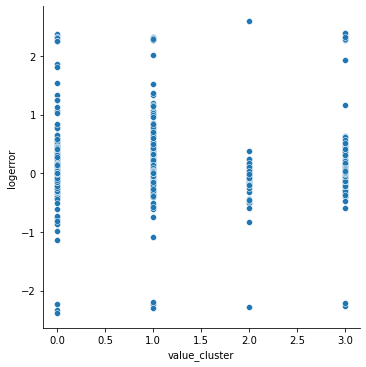

In [62]:
sns.relplot(data = train, x = 'value_cluster', y = 'logerror')

There is a correlation between clusters based on tax value and logerror, we can use this new feature in our modeling.

### 4. Is there a correlation between bedroom count and logerror?

- pearsonr test

$H_{0}$: There is no correlation between bedroom count and logerror

$H_{a}$ There is a correlation between bedroom count and logerror

In [63]:
x = train.bedroomcnt
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


#### There is a correlation between bedroom count and logerror
Let's visualize

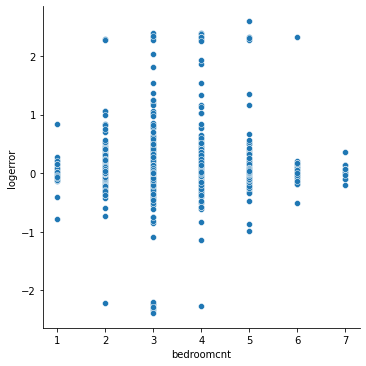

In [64]:
sns.relplot(data = train, x = 'bedroomcnt', y = 'logerror')

The log error is greater within the second quartile of the bedroomcnt

### 5. Is there a correlation between bathroom count and logerror?

- pearsonr test

$H_{0}$: There is no correlation between bathroom count and logerror

$H_{a}$ There is a correlation between bathroom count and logerror

In [65]:
x = train.bathroomcnt
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


#### There is a correlation between bathroom count and logerror

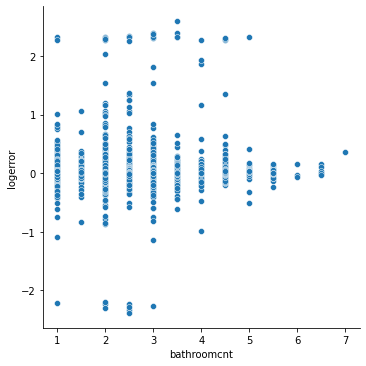

In [66]:
sns.relplot(data = train, x = 'bathroomcnt', y = 'logerror')

It looks like the first quartile has greater log error

### 6. Is there a correlation between calculatedfinishedsquarefeet and logerror?

- pearsonr test

$H_{0}$: There is no correlation between finished square feet and logerror

$H_{a}$ There is a correlation between finished square feet and logerror

In [67]:
x = train.calculatedfinishedsquarefeet
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


There is a correlation between finished square feet and logerror

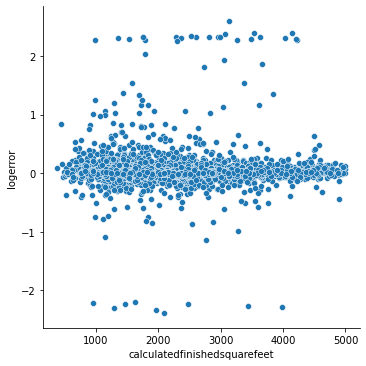

In [68]:
sns.relplot(data = train, x = 'calculatedfinishedsquarefeet', y = 'logerror')